# WeatherPy
-----------------------------------------------------------------------------

Analysis:

- According to the Max Temperature vs Latitude scatter plot, the closer we approach the equator, the higher the temperatures get. Although the peak is closer to between the 15 and 35 degree Latitude mark. This is because the Earth is tilted on its axis and that is most likely the point at which the Earth is currently closest to the sun.

-The Humidity, Cloudiness, and Wind Speed show no correlation to Latitude. This is most likely because all these factors are more closely related to distance from a body of water, such as the ocean and any storm systems currently in the area. They could also be because of a difference in Longitude, which could show the different regions better.

-The linear regression models of Temperature vs Latitude show that for the Northern Hemisphere, there is a negative correlation and for the Southern Hemisphere there is a positive correlation. If you look closely, however, both show that the closer to the equator the city is, the higher the Max Temperature will be therefore they are both confirming the same thing.

-The linear regression models for Humidity, Cloudiness, and Wind Speed vs Latitude show no real correlation between them as seen by their relatively flat regression lines.

-----------------------------------------------------------------------------

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
    
    
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | mount pearl
Processing Record 3 of Set 1 | mtwara
Processing Record 4 of Set 1 | olonkinbyen
Processing Record 5 of Set 1 | kodiak
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | roma
Processing Record 8 of Set 1 | isabela
Processing Record 9 of Set 1 | fortuna
Processing Record 10 of Set 1 | bhimunipatnam
Processing Record 11 of Set 1 | ambovombe
Processing Record 12 of Set 1 | roswell
Processing Record 13 of Set 1 | laguna
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | cockburn town
Processing Record 16 of Set 1 | la passe
Processing Record 17 of Set 1 | malax
Processing Record 18 of Set 1 | nova sintra
Processing Record 19 of Set 1 | fort bragg
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | nuku'alofa
Processing Record 22 of Set 1 | kerikeri
Processing Record 23 of Set 

City not found. Skipping...
Processing Record 40 of Set 4 | yeni suraxani
City not found. Skipping...
Processing Record 41 of Set 4 | geraldton
Processing Record 42 of Set 4 | ust-nera
Processing Record 43 of Set 4 | guerrero negro
Processing Record 44 of Set 4 | tughyl
Processing Record 45 of Set 4 | kharabali
Processing Record 46 of Set 4 | weno
Processing Record 47 of Set 4 | oujda-angad
Processing Record 48 of Set 4 | carutapera
Processing Record 49 of Set 4 | cidreira
Processing Record 0 of Set 5 | prattville
Processing Record 1 of Set 5 | anadyr
Processing Record 2 of Set 5 | constantia
Processing Record 3 of Set 5 | eyl
Processing Record 4 of Set 5 | rio san juan
Processing Record 5 of Set 5 | atafu village
Processing Record 6 of Set 5 | damghan
Processing Record 7 of Set 5 | tromso
Processing Record 8 of Set 5 | buxton
Processing Record 9 of Set 5 | felidhoo
City not found. Skipping...
Processing Record 10 of Set 5 | markala
Processing Record 11 of Set 5 | yarmouth
Processing R

Processing Record 31 of Set 8 | dauphin
Processing Record 32 of Set 8 | hammerfest
Processing Record 33 of Set 8 | isafjordur
Processing Record 34 of Set 8 | broome
Processing Record 35 of Set 8 | novospasskoye
Processing Record 36 of Set 8 | luderitz
Processing Record 37 of Set 8 | tataouine
Processing Record 38 of Set 8 | ad dabbah
Processing Record 39 of Set 8 | menaka
Processing Record 40 of Set 8 | prado
Processing Record 41 of Set 8 | lisala
Processing Record 42 of Set 8 | ituango
Processing Record 43 of Set 8 | nova vicosa
Processing Record 44 of Set 8 | tadine
Processing Record 45 of Set 8 | les cayes
Processing Record 46 of Set 8 | tuy hoa
Processing Record 47 of Set 8 | childress
Processing Record 48 of Set 8 | callao
Processing Record 49 of Set 8 | ebon
Processing Record 0 of Set 9 | el galpon
Processing Record 1 of Set 9 | kiama
Processing Record 2 of Set 9 | surovikino
Processing Record 3 of Set 9 | gaspe
Processing Record 4 of Set 9 | guasdualito
Processing Record 5 of Se

Processing Record 19 of Set 12 | martapura
Processing Record 20 of Set 12 | san francisco
Processing Record 21 of Set 12 | katsuura
Processing Record 22 of Set 12 | san pedro arriba
Processing Record 23 of Set 12 | thongwa
Processing Record 24 of Set 12 | tatarsk
Processing Record 25 of Set 12 | layyah
Processing Record 26 of Set 12 | duncan town
City not found. Skipping...
Processing Record 27 of Set 12 | pionerskiy
Processing Record 28 of Set 12 | pavlogradka
Processing Record 29 of Set 12 | hirara
Processing Record 30 of Set 12 | mawlamyinegyunn
Processing Record 31 of Set 12 | north haven
Processing Record 32 of Set 12 | klamath falls
Processing Record 33 of Set 12 | mudanjiang
Processing Record 34 of Set 12 | kalianget
Processing Record 35 of Set 12 | kiunga
Processing Record 36 of Set 12 | kandahar
Processing Record 37 of Set 12 | san pedro pochutla
Processing Record 38 of Set 12 | island harbour
Processing Record 39 of Set 12 | shushtar
Processing Record 40 of Set 12 | chacabuco

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,34.41,98,100,10.92,GS,1689959927
1,mount pearl,47.5166,-52.7813,84.45,62,20,17.27,CA,1689959904
2,mtwara,-10.2667,40.1833,79.14,56,100,13.33,TZ,1689960056
3,olonkinbyen,70.9221,-8.7187,41.38,79,100,4.45,SJ,1689959729
4,kodiak,57.7900,-152.4072,53.11,82,0,0.00,US,1689959999


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,34.41,98,100,10.92,GS,1689959927
1,mount pearl,47.5166,-52.7813,84.45,62,20,17.27,CA,1689959904
2,mtwara,-10.2667,40.1833,79.14,56,100,13.33,TZ,1689960056
3,olonkinbyen,70.9221,-8.7187,41.38,79,100,4.45,SJ,1689959729
4,kodiak,57.7900,-152.4072,53.11,82,0,0.00,US,1689959999


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

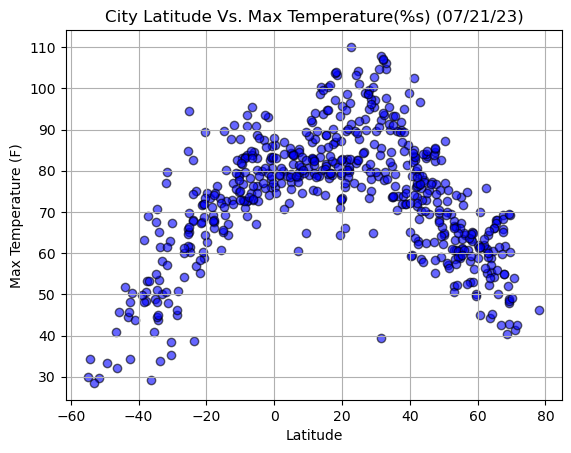

In [55]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"],
           color="blue", edgecolor="black", marker="o",
           alpha=0.6)


# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature(%s) (07/21/23)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

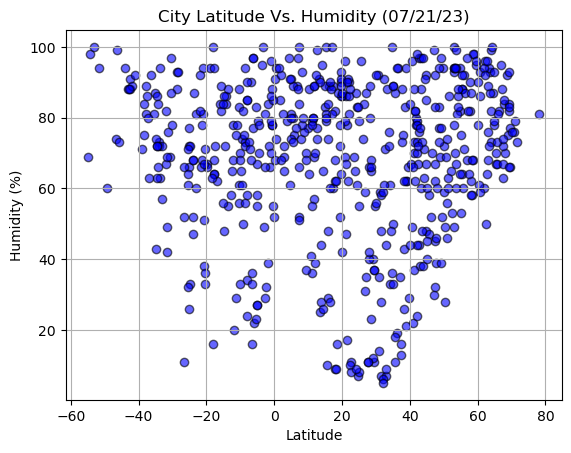

In [56]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"],
           color="blue", edgecolor="black", marker="o",
           alpha=0.6)

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity (07/21/23)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

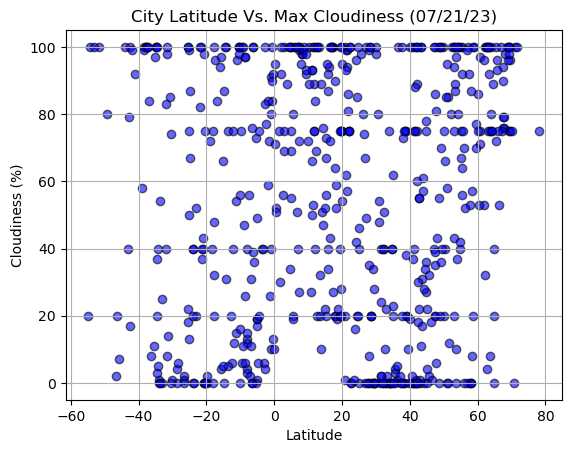

In [57]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"],
           color="blue", edgecolor="black", marker="o",
           alpha=0.6)

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Cloudiness (07/21/23)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

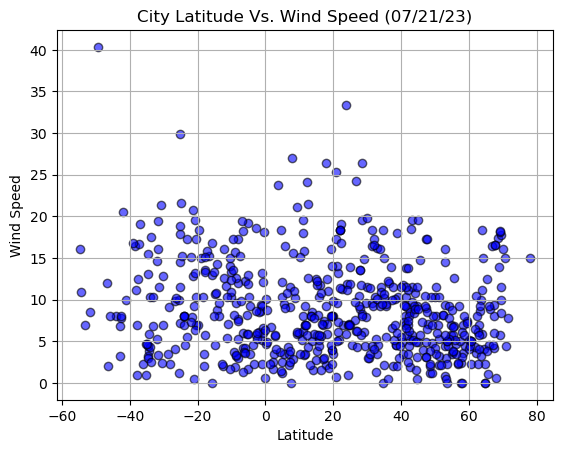

In [58]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"],
           color="blue", edgecolor="black", marker="o",
           alpha=0.6)

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed (07/21/23)")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [34]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")
    plt.show() 

In [35]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,mount pearl,47.5166,-52.7813,84.45,62,20,17.27,CA,1689959904
3,olonkinbyen,70.9221,-8.7187,41.38,79,100,4.45,SJ,1689959729
4,kodiak,57.7900,-152.4072,53.11,82,0,0.00,US,1689959999
6,roma,43.2128,-75.4557,75.72,60,100,5.75,US,1689959839
7,isabela,6.7085,121.9711,78.49,89,51,4.34,PH,1689960056


In [36]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,34.41,98,100,10.92,GS,1689959927
2,mtwara,-10.2667,40.1833,79.14,56,100,13.33,TZ,1689960056
5,adamstown,-25.0660,-130.1015,69.84,72,50,29.93,PN,1689959927
10,ambovombe,-25.1667,46.0833,65.19,66,99,17.90,MG,1689960057
13,port-aux-francais,-49.3500,70.2167,33.30,60,80,40.35,TF,1689959674


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.6525941231094824


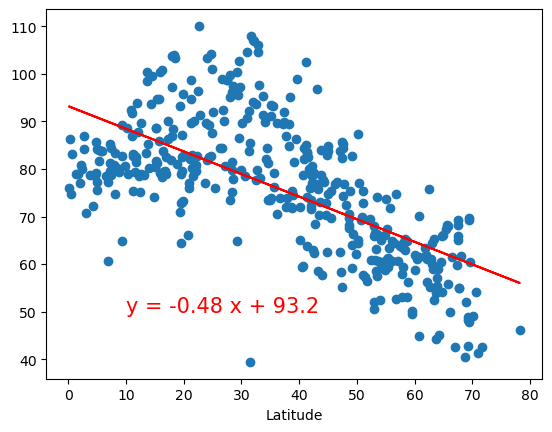

In [40]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (10,50))

The r-squared is: 0.8328786554123042


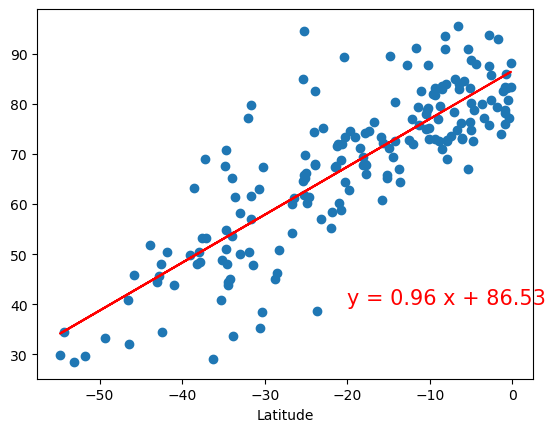

In [41]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-20,40))

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.11023455575350766


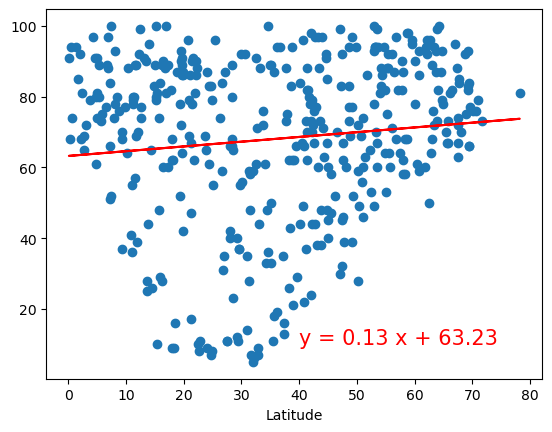

In [42]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (40,10))

The r-squared is: -0.24154496805407302


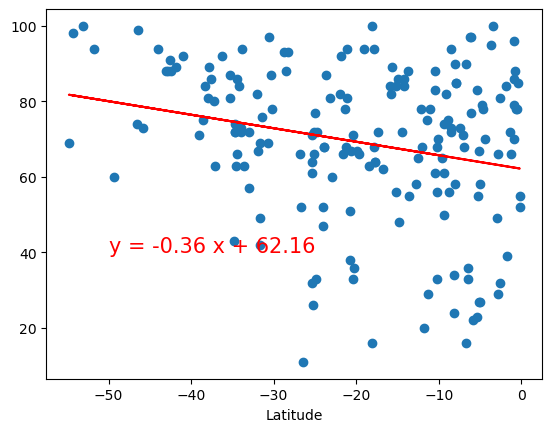

In [44]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-50,40))

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: -0.0018647126344577664


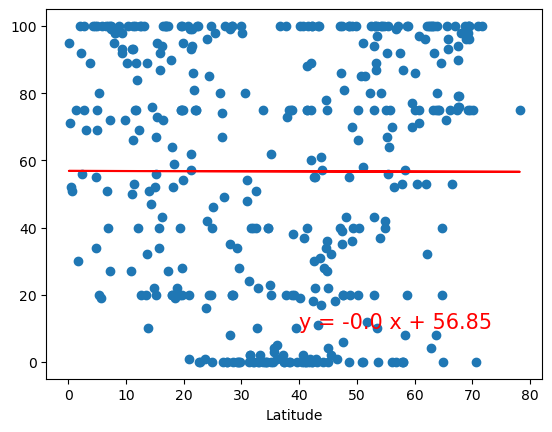

In [45]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (40,10))

The r-squared is: -0.09031185460060151


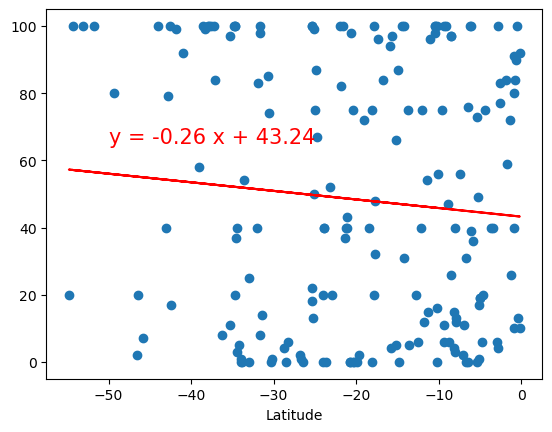

In [49]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-50,65))

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: -0.09481412923795904


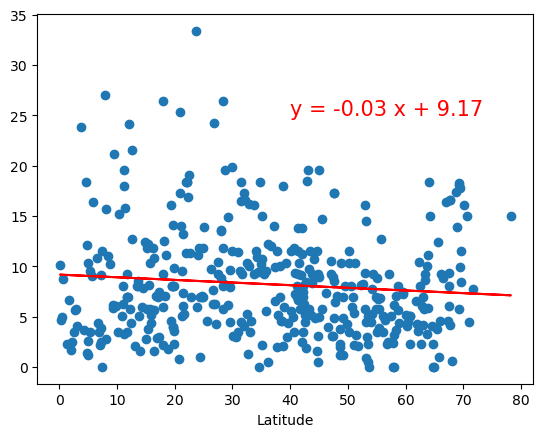

In [51]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (40,25))

The r-squared is: -0.11855089851207593


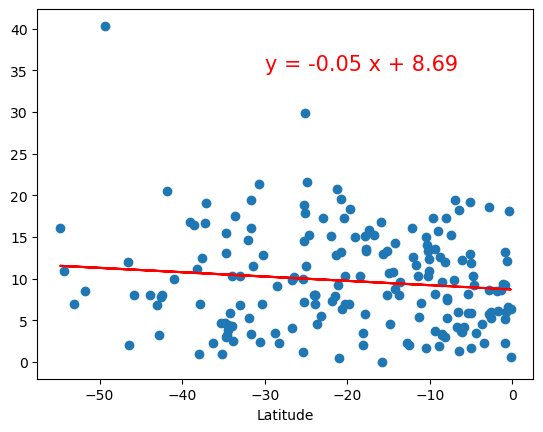

In [54]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (-30,35))